# Mushroom Classification | kaggle

### 출처

http://kkokkilkon.tistory.com/37 [꼬낄콘의 분석일지]
https://www.kaggle.com/raghuchaudhary/mushroom-classification



Hi, I'm going to apply 6 supervised machine learning classification models and an ANN model on the given dataset to classify mushrooms as poisonous or eatable.


## 6가지 지도학습 알고리즘 분류모델

1. Logistic Regression
2. Support Vector machines (SVC)
3. K-Nearest Neighbours(K-NN)
4. Naive Bayes classifier
5. Decision Tree Classifier
6. Random Forest Classifier

## ANN 모델

1. Artificial Neural Networks

## (1) 더미변수란?


1. 더미변수는 범주형 변수를 연속형 변수로 변환한 것인데, 정확히 따지자면 연속형 변수"스럽게" 만든 것이다.



  - 연속형 변수
   숫자로 이루어져 있으며, 끊키는 부분 없이 연속적으로 값을 가질  수 있다.
   예를 들면 키, 몸무게, 온도, 나이, 고객수, 구매율 등



  - 범주형 변수
   문자 또는 숫자로 이루어져 있으며, 범주(카테고리)가 있다.
   예를 들면 학년(1, 2, 3), 혈액형(A, B, O, AB), 성별(남, 여) 등


## (2) 더미변수는 왜 만드나?


범주형 변수로는 사용할 수 없고 연속형 변수로만 가능한 분석기법을 사용할 수 있게 해준다.

예를 들어 선형 회귀분석, 로지스틱 회귀분석 등 회귀분석 계열은 원래 설명변수가 연속형 변수여야지 사용할 수 있는 분석 기법이다. 하지만 만약 설명변수 중에 범주형 변수가 섞여 있다면, 그 변수를 더미변수로 변환 즉, 연속형 변수스럽게 만들어서 회귀분석을 사용할 수 있다.

## (3) 더미변수의 특징

1.  더미변수는 0 또는 1의 값을 가진다
2.  더미변수는 원래 범주형 변수의 범주 개수보다 1개 적게 만들어진다.


## 차원축소 하는 이유

차원의 저주 : 고차원의 데이터에서는 관측 step도 기하급수적으로 증가하고 메모리 문제가 생긴다. 

대부분의 상황에서 차원의 크기는 특징의 개수를 나타내고
특징(feature)이 너무 많기 때문에 학습이 어렵고 더 좋은 특징만 가지고 사용하겠다는 것

그렇다면 이러한 특징은 어떻게 뽑아낼까요?
여러가지 방식이 있지만, 기본적인 '주성분 분석'
주성분분석은 데이터의 분포를 가장 잘 표현하는 성분을 찾아주는 것

https://medium.com/qandastudy/mathpresso-%EB%A8%B8%EC%8B%A0-%EB%9F%AC%EB%8B%9D-%EC%8A%A4%ED%84%B0%EB%94%94-15-%EC%B0%A8%EC%9B%90-%EC%B6%95%EC%86%8C-dimensionality-reduction-76b13460506f

I'll proceed by converting categorical variables into dummy/indicator variables, then reducing dimensions using Princple Component Analysis to reduce 23 categorical variables (which will become 95 variables after conversion) to only 2 variables (Principle Components) 

범주형 변수를 더미변수로 변환하겠다.
그 다음, 주성분 분석을 통해 차원을 축소를 하겠다. 

 - 23개의 범주형 변수 - get_dummies 변환 후 95개로 늘어남 - PCA 2개로 설정

and training different classification models over these two principle components.

여러가지 분류모델을 2개의 주성분에 학습시키겠다. 

Finally, I'll visualize the outputs so that decision boundaries of different models can be seen in 2D-plane. Here the preference is not given to accuracy as the goal is to visualize the decision boundaries. For greater accuracy one can choose more than two variables.

시각화 하겠다.

# 나는 가장 성능이 뛰어난 3개만 돌림
# ANN, K-NN, Randomforest
# 오전에 Decision Tree 했으니 총 4개 해봄

## Importing the Libraries¶


In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Importing the Dataset


In [2]:
df=pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Checking for nulls


In [3]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Description of Dataset


In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Class column is response and rest columns are predictors.


Seprating Predictors and Response

In [5]:
X = df.drop('class', axis=1) #Predictors
# X = df.drop(columns=['class'])
y = df['class'] #Response

## Encoding categorical data
 - 인코딩은 카테고리 값이나 텍스트 정보를 처리가 쉬운 정수로 변환하는 과정이다.


### Label encoding


In [6]:
from sklearn.preprocessing import LabelEncoder
LE_X = LabelEncoder()
LE_y = LabelEncoder()

In [7]:
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [59]:
y[0:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [9]:
for col in X.columns:
    X[col] = LE_X.fit_transform(X[col])
#     LE.inverse_transform : 역변환!!!
y = LE_y.fit_transform(y)
# LE_y.fit_transform(y) 이것만 해서..바보

In [10]:
X.head(2)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1


* fit : Fit label encoder
* transform : Transform labels to normalized encoding.
* fit_transform : Fit label encoder and return encoded labels



In [11]:
y
# Poisnous = 1, Eatable = 0

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [12]:
X.head(2)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1


In [13]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


* 캐글에서 LabelEncoder() 한 뒤에 get_dummies를 또 한 이유를 모르겠다.

* 바로 get_dummies 해도 똑같이 나온다!

* 그러나, 캐글의 다른 유저도 라벨인코더 - get_dummies 하네..뭐지!

## Splitting the dataset into the Training set and Test set


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 0 )

In [15]:
X_train.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
5314,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2075,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
5165,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1155,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4448,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0


## Feature Scaling
 - 숫자(0,1)로 잘 나뉘어져 있는데, 굳이 Scaling 하는 이유는?
 - Feature Scaling 검색 해보기


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [17]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

* 'train set'에만 fit 시키고, test 에는 transform만 시킨다.
* 그게 더 성능이 좋게 나왔다.

In [18]:
X_train[0]

array([-0.02297586, -0.79559384, -0.33573823, -0.0623232 ,  1.10228717,
       -0.02297586,  1.48134467, -0.81847249, -0.07869939, -0.47562995,
       -0.54930859, -0.62903094, -0.13515353, -0.04598815, -0.04197385,
        2.63464244, -0.38107285,  1.19059523, -0.15888178,  1.67431911,
       -0.22672743, -0.07034732, -0.88046053, -0.18694174, -0.27508469,
       -0.27803239,  0.15829905, -0.44277018, -0.67561447, -0.11164402,
       -0.31288232,  3.13865338, -0.23013684, -0.3816779 , -0.08729296,
       -0.47312627, -0.05635356, -0.25532911, -0.42127124, -0.10151657,
        0.875122  ,  1.07871337, -0.26685813, -0.40757793, -0.15476116,
       -0.64130204, -1.32118642, -0.05476098, -0.62821408,  0.80446322,
       -0.19192297, -0.07034732, -0.11083383, -0.27323081, -0.23725159,
       -0.14931222, -0.54849475,  0.9004599 , -0.03250135, -0.07034732,
       -0.10836869, -0.27434422, -0.25571966, -0.14931222, -0.54930859,
        0.91821121, -0.05790288, -0.10753501,  0.15296447, -0.03

## Applying PCA with n_components = 2
 - Principal Componest Analysis

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 2개로 차원을 축소하겠다! = feature 갯수

In [20]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [21]:
X_train

array([[ 0.17035026, -1.44905345],
       [-3.45392097, -2.03814436],
       [-0.5719283 , -1.86533117],
       ...,
       [-1.74444283, -1.60938794],
       [-2.06204725, -0.70688028],
       [-1.23214253, -1.37138551]])

## Functions to visualize Training & Test Set Results.


In [22]:
def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

## 가. Artificial Neural Networks (ANN)


In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### 1. Initializing ANN


In [24]:
classifier = Sequential() # Linear stack of layers.

### 2. Adding Layers


In [25]:
classifier.add(Dense(8, kernel_initializer='uniform', activation='relu', input_dim =2))
classifier.add(Dense(6, kernel_initializer='uniform', activation = 'relu'))
classifier.add(Dense(4, kernel_initializer='uniform', activation = 'relu'))
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

### 3. Fitting ANN to Training Set


In [26]:
X_train.shape

(5686, 2)

In [27]:
X_test.shape

(2438, 2)

In [28]:
classifier.fit(X_train, y_train, batch_size = 10, epochs=100 )

Epoch 1/100
5686/5686 [==============================] - 1s 126us/step - loss: 0.6039 - acc: 0.6940
Epoch 2/100
5686/5686 [==============================] - 1s 89us/step - loss: 0.4678 - acc: 0.8976
Epoch 3/100
5686/5686 [==============================] - 1s 91us/step - loss: 0.4178 - acc: 0.8996
Epoch 4/100
5686/5686 [==============================] - 0s 78us/step - loss: 0.3844 - acc: 0.9008
Epoch 5/100
5686/5686 [==============================] - 0s 77us/step - loss: 0.3615 - acc: 0.9010
Epoch 6/100
5686/5686 [==============================] - 1s 88us/step - loss: 0.3447 - acc: 0.9008
Epoch 7/100
5686/5686 [==============================] - 0s 74us/step - loss: 0.3306 - acc: 0.9012
Epoch 8/100
5686/5686 [==============================] - 0s 71us/step - loss: 0.3198 - acc: 0.9017
Epoch 9/100
5686/5686 [==============================] - 0s 69us/step - loss: 0.3100 - acc: 0.9024
Epoch 10/100
5686/5686 [==============================] - 0s 68us/step - loss: 0.3003 - acc: 0.9026
Epoch 11

Epoch 83/100
5686/5686 [==============================] - 0s 81us/step - loss: 0.2134 - acc: 0.9205
Epoch 84/100
5686/5686 [==============================] - 0s 71us/step - loss: 0.2121 - acc: 0.9198
Epoch 85/100
5686/5686 [==============================] - 0s 73us/step - loss: 0.2124 - acc: 0.9212
Epoch 86/100
5686/5686 [==============================] - 0s 81us/step - loss: 0.2122 - acc: 0.9210
Epoch 87/100
5686/5686 [==============================] - 0s 76us/step - loss: 0.2126 - acc: 0.9195
Epoch 88/100
5686/5686 [==============================] - 0s 77us/step - loss: 0.2119 - acc: 0.9191
Epoch 89/100
5686/5686 [==============================] - 0s 78us/step - loss: 0.2132 - acc: 0.9210
Epoch 90/100
5686/5686 [==============================] - 0s 79us/step - loss: 0.2129 - acc: 0.9214
Epoch 91/100
5686/5686 [==============================] - 0s 78us/step - loss: 0.2116 - acc: 0.9198
Epoch 92/100
5686/5686 [==============================] - 0s 78us/step - loss: 0.2116 - acc: 0.9214


### 4. Predicting the Test Set Results


In [40]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

### 5. Confusion Matrix
 - TP : 맞는 걸 맞다(Positive)라고 판단
 - FP : 틀린 걸 맞다(Positive)라고 판단
 - FN : 틀린 걸 틀렸다(Negative)라고 판단
 - TN : 맞는 걸 틀렸다(Negative)라고 판단

* Classification metrics can't handle a mix of binary and continuous targets
* 그래서 True or False로 표현해줘야함.
* y_pred = (y_pred>0.5) 한 이유인가!? 왜 하필 0.5 인지?


In [42]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))

[[1239   33]
 [ 139 1027]]


* Classification metrics can't handle a mix of binary and continuous targets
* 그래서 True or False로 표현해줘야함.
* y_pred = (y_pred>0.5) 한 이유인가!?


### 6. Classification Report
 - precision(정밀도) : Positive 클래스에 속한다고 출력한 샘플 중 실제로 Positive 클래스에 속하는 샘플 수의 비율
 - recall(재현율) : 실제 Positive 클래스에 속한 샘플 중에 Positive 클래스에 속한다고 출력한 표본의 수
 - F(beta) score : 정밀도(Precision)과 재현율(Recall)의 가중 조화 평균
 - 암튼 높으면 좋당.

In [43]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.97      0.94      1272
          1       0.97      0.88      0.92      1166

avg / total       0.93      0.93      0.93      2438



### 7. Visualizing ANN Training Set results
 - 저 위에~ 함수 만들어 놨음


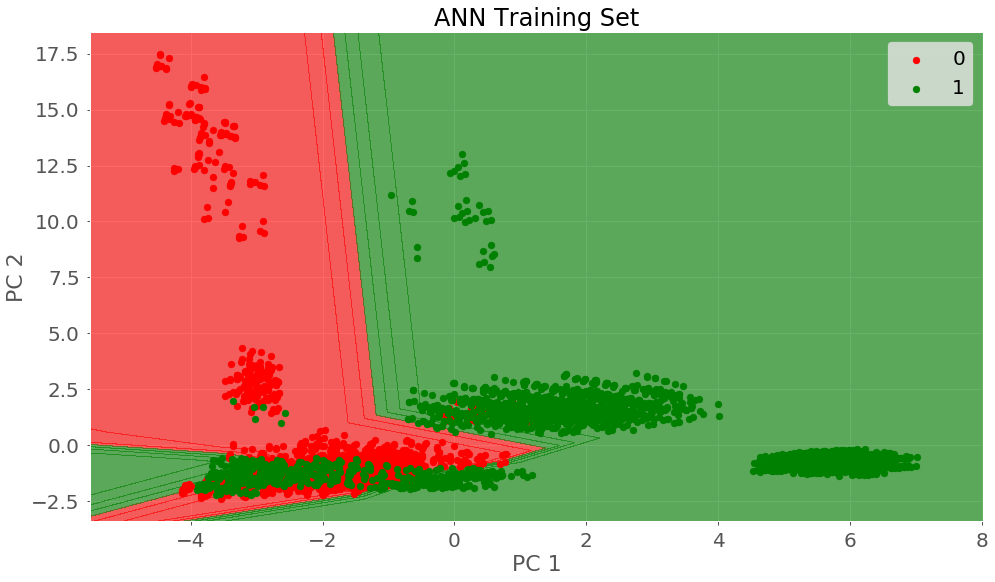

In [44]:
visualization_train(model='ANN')

### 8. Creating a func to evaluate model's performance.¶


In [52]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [54]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

In [56]:
# print_score(classifier, X_train, y_train, X_test, y_test, train=True)

## 나. K Nearest Neighbors (K-NN) Classification Model


### 1. Fitting K-NN to the Training set

In [61]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [63]:
classifier = KNN()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### 2. K-NN Training Results
 - 저 위에 만들어 놓은 함수 활용~~!


In [64]:
print_score(classifier, X_train, y_train, X_test, y_test, train=True)

Training results:

Accuracy Score: 0.9420

Classification Report:
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      2936
          1       0.97      0.91      0.94      2750

avg / total       0.94      0.94      0.94      5686


Confusion Matrix:
[[2851   85]
 [ 245 2505]]

Average Accuracy:	0.9253

Standard Deviation:	0.0072


### 3. K-NN Test Results


In [65]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9372

Classification Report:
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1272
          1       0.96      0.91      0.93      1166

avg / total       0.94      0.94      0.94      2438


Confusion Matrix:
[[1224   48]
 [ 105 1061]]



### 4. Visualising the K-NN Training set results


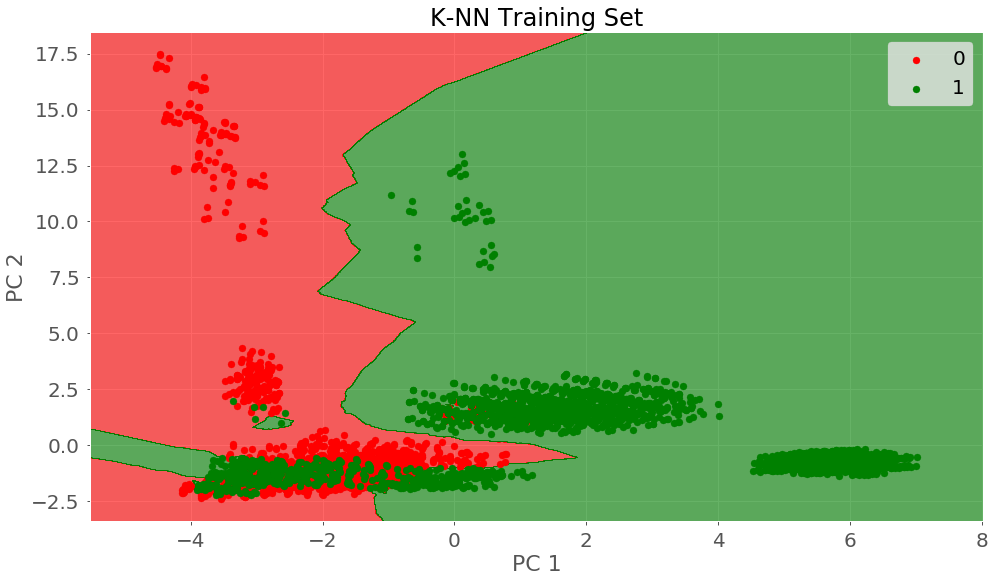

In [66]:
visualization_train('K-NN')

### 5. Visualising the K-NN Test set results


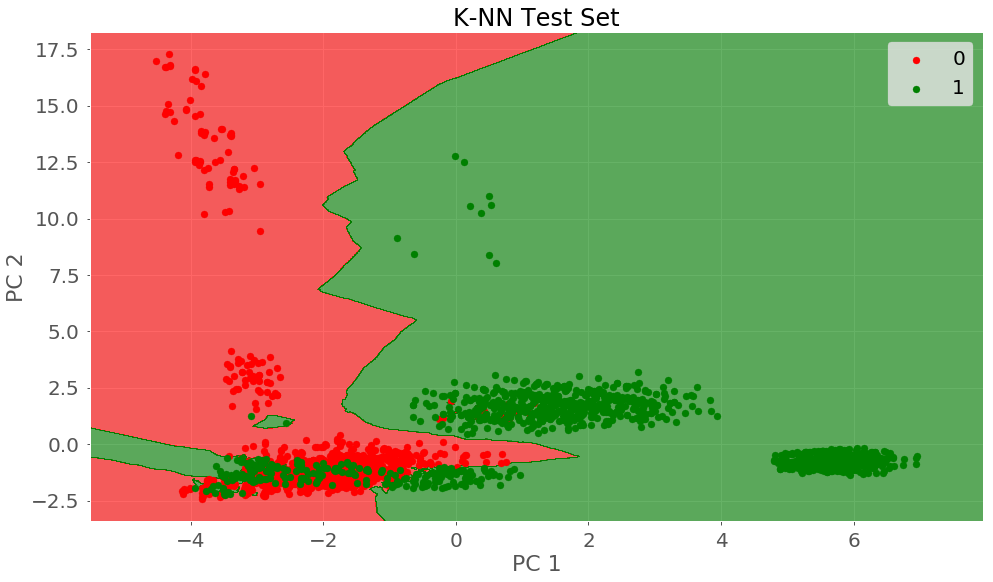

In [67]:
visualization_test('K-NN')

## 다. Random Forest Classification Model


### 1. Fitting Random Forest classifier to the Training set

In [80]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, criterion = 'entropy', random_state=42)

In [81]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### 2. Random Forest Training Results


In [82]:
print_score(classfier, X_train, y_train, X_test, y_test, train=True)

Training results:

Accuracy Score: 0.9993

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2936
          1       1.00      1.00      1.00      2750

avg / total       1.00      1.00      1.00      5686


Confusion Matrix:
[[2936    0]
 [   4 2746]]

Average Accuracy:	0.9230

Standard Deviation:	0.0102


### 3. Random Forest Test Results


In [83]:
print_score(classfier, X_train, y_train, X_test, y_test, train=False)

Test results:

Accuracy Score: 0.9299

Classification Report:
             precision    recall  f1-score   support

          0       0.92      0.95      0.93      1272
          1       0.95      0.90      0.93      1166

avg / total       0.93      0.93      0.93      2438


Confusion Matrix:
[[1212   60]
 [ 111 1055]]



### 4. Visualising the Random Forest Training set results

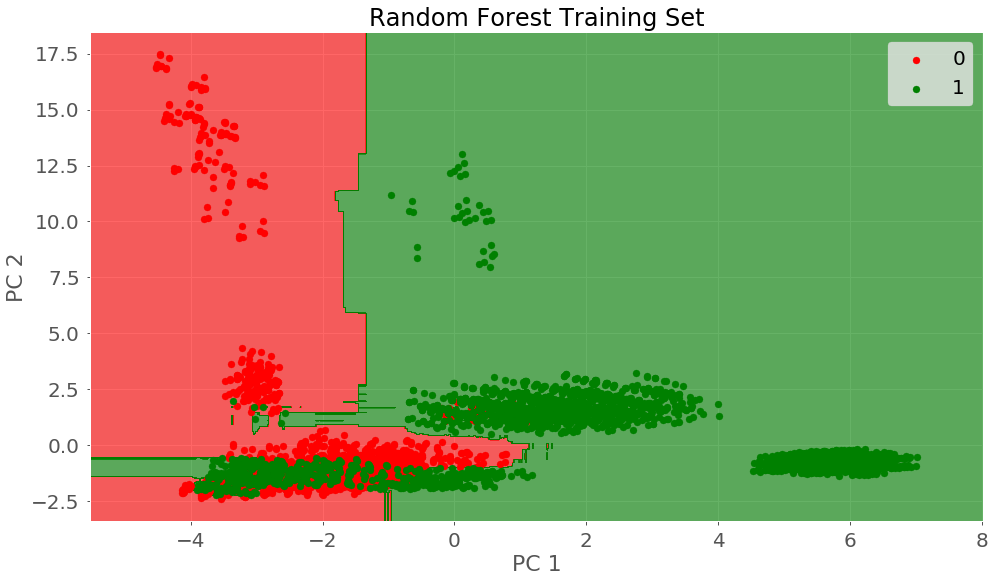

In [84]:
visualization_train('Random Forest')

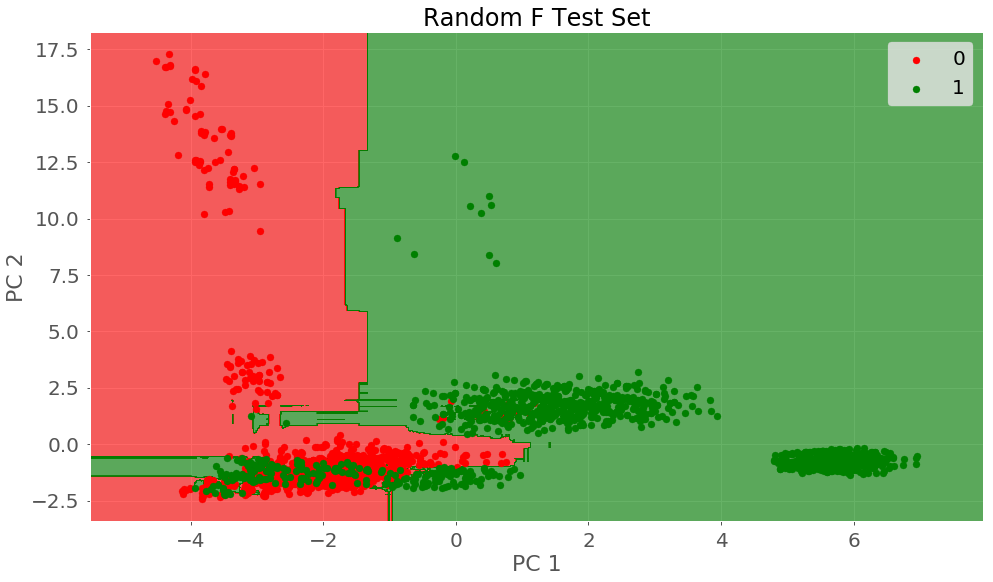

In [85]:
visualization_test('Random F')